In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib

In [215]:
data = pd.read_csv("C:/Users/HP/Pictures/Camera Roll/SPAM text message 20170820 - Data.csv")

In [216]:
data.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [217]:
stemmer = PorterStemmer()

In [218]:
words = [ ]
for i in range(len(data)):
    text = re.sub('^[a-zA-Z0-9]', ' ', data['Message'][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    words.append(text)

In [219]:
vectorizer = CountVectorizer(ngram_range= (1, 3), max_features= 2500, binary = True)
x = vectorizer.fit_transform(words).toarray()
label = LabelEncoder()
y_encoded = label.fit_transform(data['Category'])
encoded_values = dict(zip(label.classes_, label.transform(label.classes_)))
encoded_values

{'ham': 0, 'spam': 1}

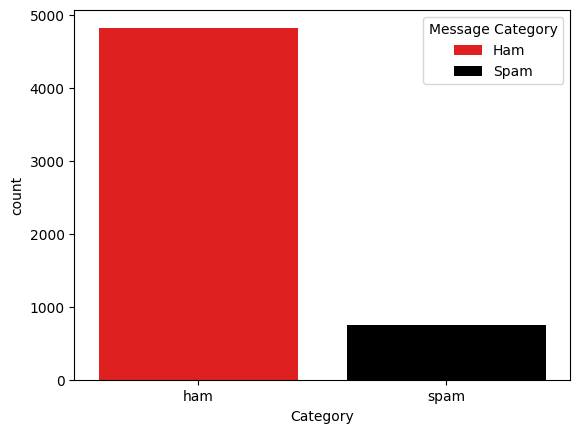

In [220]:
sns.countplot( x = 'Category', data = data, palette= ('red', 'black'))
plt.legend(title = "Message Category", labels = ['Ham', 'Spam']);

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, random_state= 42, test_size= 0.2)

In [128]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [156]:
encoded_values

{'ham': 0, 'spam': 1}

In [135]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [136]:
accuracy_score(y_test, y_pred)

0.9838565022421525

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [223]:
conf_mtx

array([[963,   3],
       [ 15, 134]], dtype=int64)

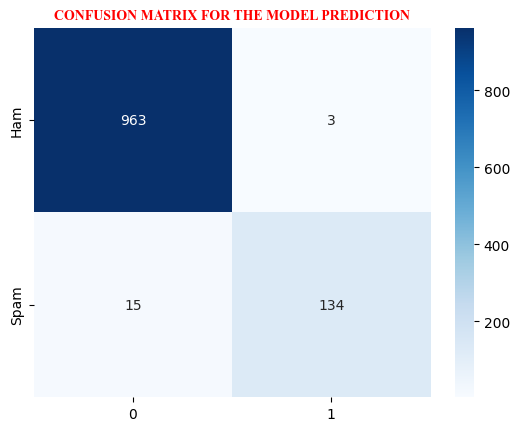

In [244]:
conf_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mtx, annot = True, cmap = plt.cm.Blues, fmt = 'd', yticklabels= ('Ham', 'Spam'))
plt.title("CONFUSION MATRIX FOR THE MODEL PREDICTION", fontsize = 21, color = 'red', font = 'Times New Roman',
          fontweight = 'bold')
plt.show();

In [185]:
question = input("Enter your message:", )
question = (question, )
prompts = [ ]
for i in range(len(question)):
    text = re.sub('^[a-zA-Z0-9]', ' ', question[i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    prompts.append(text)
test = vectorizer.transform(prompts).toarray()

Enter your message:Go until jurong point, crazy.. Available only ..


In [189]:
prediction = model.predict(test)
for i in range(len(prediction)):
    
    if prediction > 0.5:
        print("This is a spam!")
    else:
        print("This is not a spam")

This is not a spam


In [246]:
joblib.dump(model, 'spamdetection.joblib')

['spamdetection.joblib']

In [ ]:
import os

model_path = "diabetes_model.h5"
model_size = os.path.getsize(model_path)  # Size in bytes
model_size_MB = model_size / (1024 * 1024)  # Size in megabytes

print(f"The size of the model is {model_size_MB:.2f} MB")
